<a href="https://colab.research.google.com/github/fatemafaria142/Banglish-to-Bangla-Neural-Machine-Translation/blob/main/Banglish_to_Bangla_Machine_Translation_using_BanglaT5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.util import ngrams

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Path**

In [4]:
# Read the datasets
train_data = pd.read_csv("/content/drive/MyDrive/Banglish to Bangla/train_dataset.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Banglish to Bangla/test_dataset.csv")
validation_data = pd.read_csv("/content/drive/MyDrive/Banglish to Bangla/validation_dataset.csv")

# Remove extra white spaces from column names
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()
validation_data.columns = validation_data.columns.str.strip()


In [5]:
train_data.head(5)

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,কেমন আছো ?,kemon acho?,কেন আচো?,Ken acho?,Chittagong,How are you?
1,আজকে আমার মন ভালো নেই,ajke amr mon valo nei,আযিয়া আর মন বালা নাই?,ajiya ar mon bala nai?,Chittagong,I'm not feeling well today
2,তুমি কি করো ?,tumi ki koro?,তুঁই কি গরো?,tui ki goro?,Chittagong,what are you doing?
3,এই গরমে আমার কিছু ভালো লাগে না,ei gorome amar kichu valo lage na,এই গরমত আত্তুন কিচু বালা ন লাগের,ei goromot attun kichu bala no lager,Chittagong,I don't like anything this summer
4,ছেলেটি সাদা রঙয়ের একটি শার্ট পরে এসেছিল,cheleti sada ronger ekti shirt pore eshechilo,ফোয়াইবা সাদা রংওর উজ্ঞা শার্ট ফরি আইস্যিল,foyaiba sada rongor ugga shirt fori aissilo,Chittagong,The boy came wearing a white shirt


In [6]:
train_data.tail(5)

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
1870,কাউকে মিথ্যা বলে খুশী করার থেকে সত্যি বলে কাঁদ...,kauke mittha bole khushi korar theke sotti bol...,কোনিক্কারে মিথ্যা খইয়েরে কুশী করিবার তুন সত্...,konikkare mittha khoiyere khushi koribar tun...,Chittagong,It's better to be happy for telling a lie than...
1871,"একে অপরের প্রতি যতো বেশী বিশ্বাস থাকবে, তাদের ...","eke oporer proti joto beshi bisshas thakbe, ta...","এইজ্ঞো আরেজ্ঞোর ফ্রতি বোত বিশ্বাস থাইবো, ইতা...","eiggoareggor froti bot bishsas thaibo, itaror ...",Chittagong,"The more trust they have in each other, the he..."
1872,বৃষ্টি বেড়ে তাপমাত্রা কমার সুখবর দিয়েছে আবহা...,brishti bere tapmatra komar sukhobor diyeche a...,বৃষ্টি বাইরলে তাপমাত্রা কমিবার সুখবর দিয়ে আব...,brishti bairle tapmatra komibar sukhobor diye ...,Chittagong,Meteorological office has given the good news ...
1873,পুরো বর্ষা মৌসুমে হাতে গোনা কয়েকদিন মাত্র বৃষ...,puro borsha moushume hate gona koyekdin matro ...,ফুরা বর্ষা মৌসুমোত হাতে গুনা হোয়োজ্ঞা দিন মাত্...,fura borsha mousumot hate guna hoyogga din mat...,Chittagong,After only a handful of days of rain in the en...
1874,খাওয়ার অনেক আগেই যদি ভাত রান্না শেষ হয়ে গিয়ে থ...,khaoyar onek agei jodi vat ranna shesh hoye gi...,খাওয়ার বহুত আগোত যদি ভাত রান্না শেষ ওয় গি তা...,khaoyar bohut agot jodi vat ranna shesh oy gi ...,Chittagong,If the rice is done cooking long before eating...


In [7]:
test_data.head(5)

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,তোমার আব্বু কেমন আছে?,tomar abbu kemon ache?,তোয়ার আব্বু কেন আসে?,toyar abbu ken ase?,Chittagong,How is your father?
1,আমার বড় বোনের আজকে মন ভালো নেই,amar boro boner ajke mon valo nei,আর বর বইনোর আজিয়া মন ভালা নাই,ar bor boinor ajiya mon vala nai,Chittagong,My elder sister is not feeling well today
2,তুমি কি আমাকে এই কাজটি করে দিতে পারবে?,tumi ki amake ei kajti kore dite parbe?,তুইকি আরে হাম্মান গরি দিত্তারিবানা?,tuiki are hamman gori dittaribana?,Chittagong,Can you do this for me?
3,এই গরমে বাহিরে বের হতে ইচ্ছা করে না,ei gorome bahire ber hote iccha kore na,এই গরমত বাইর ওইতো মনত নো সার,ei goromot bair oito monot no sar,Chittagong,Don't want to go out in this summer
4,তোমার সব কথাই ভুল,tomar sob kothai vul,তোয়ার বেক হোতাই ভুল,toyar bek hotai vul,Chittagong,Everything you say is wrong


In [8]:
test_data.tail(5)

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
370,তুমি কি আমাকে এক গ্লাস পানি এনে দিতে পারবে ?,tumi ki amake ek glass pani ene dite parbe ?,তুই কি আরে এক্কা্কান গ্লাস ফানি আনি দিত্তারিবা...,tui ki are ekkakan glass fani ani dittariba na?,Chittagong,Can you get me a glass of water?
371,আমি পারবো না পানি দিতে,ami parbo na pani dite,আই ন ফাইজ্জুম ফানি দিতাম,ai n faijjum fani ditam,Chittagong,I can't give water
372,তোমার ভাই পড়ালেখাতে অনেক মেধাবি,tomar vai poralekhate onek medhabi,তোয়ার ভাই ফন্নাফরনত বহুত মেধাবি,toyar vai fonnaforonot bohut medhabi,Chittagong,Your brother is very talented in studies
373,আচ্ছা বলো দেখি বাংলাদেশে কয়টি জেলা?,accha bolo dekhi bangladeshe koyti jela?,আচ্ছা হো সাই বাংলাদেশর জেলা হইয়ান?,accha ho sai bangladeshor jela hoiyan?,Chittagong,Well tell me how many districts in Bangladesh?
374,সামনের দিকে যেয়ে মেয়েটি অনেক হাসবে,samner dike jeye meyeti onek hashbe,সামনর মিক্কা যাইয়েরে মাইয়াফোয়া ইবা বহুত হাসিব দে,samnor mikka jaiyere maiyafoya iba bohut hasib de,Chittagong,The girl will smile a lot going forward


In [9]:
validation_data.head(5)

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,বাংলাদেশে ৬৪ টা জেলা,bangladeshe ৬৪ ta jela,বাংলাদেশত ৬৪ ইয়ান জেলা,bangladeshot ৬৪ iyan jela,Chittagong,64 districts in Bangladesh
1,আমরা সবাই গতকাল বাহিরে গিয়েছিলাম,amra sobai gotokal bahire giyechilam,আরা বেয়াক্কুন গতহালিয়া বাইরে গেইলাম,ara beyakkun gotohaliya baire geilam,Chittagong,We all went out yesterday
2,তোমার কথা বলার ধরন অনেক সুন্দর,tomar kotha bolar dhoron onek sundor,তোইয়ার হতা বলার ধরণ বহুত সুন্দর,toiyar hota bolar dhoron bohut sundor,Chittagong,Your way of speaking is very nice
3,বরিশালের মানুষ কেমন হয়?,barishaler manush kemon hoy?,বরিশালর মানুষ হইল্লে অয় দে?,barishalor manush hoille oy de?,Chittagong,How are the people of Barisal?
4,খুলনা জেলা কি অনেক সুন্দর?,khulna jela ki onek sundor?,খুলনা জেলা কি বহুত সুন্দর নাকি?,khulna jela ki bohut sundor naki?,Chittagong,Khulna district is very beautiful?


In [10]:
validation_data.tail(5)

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
245,তুমি যাও এখান থেকে,tumi jao ekhan theke,তুই যো গয় এরে তুন,tui jo goy ere tun,Chittagong,you go from here
246,আপনি যান এখান থেকে,apni jan ekhan theke,ওরে যন এরে তুন,ore jon ere tun,Chittagong,You go from here
247,তুই যা এখান থেকে,tui ja ekhan theke,তুই যা গয় এরের তুন,tui ja goy erer tun,Chittagong,you go from here
248,আপনারা পার্কে ঘুরে বেড়ান,apnara parke ghure beran,ওনোরা ফার্কত গুরি বেড়াতোক,onora farkot guri beratok,Chittagong,You go for a walk in the park
249,উনি চেষ্টা করেন,uni cheshta koren,ঐইবা চেষ্টা খজ্জিল,oiiba cheshta khojjil,Chittagong,He tries


# **Define a function to visualize text length distribution**

In [11]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_text_length(data, title):
    # Calculate text length for each entry in the 'bangla_speech' and 'banglish_speech' columns and store the results in new columns
    data['bangla_speech_text_length'] = data['bangla_speech'].apply(len)
    data['banglish_speech_text_length'] = data['banglish_speech'].apply(len)

    # Create a figure with a larger size
    plt.figure(figsize=(8, 4))

    # Define a custom font with a nice appearance
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    # First subplot for 'Bangla Speech' text length distribution
    plt.subplot(1, 2, 1)
    plt.hist(data['bangla_speech_text_length'], bins=40, color='lightblue', edgecolor='black', alpha=0.7, label='Bangla Speech')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Bangla Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    # Second subplot for 'Banglish Speech' text length distribution
    plt.subplot(1, 2, 2)
    plt.hist(data['banglish_speech_text_length'], bins=40, color='lightcoral', edgecolor='black', alpha=0.7, label='Banglish Speech')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Banglish Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    # Set a single title for the entire figure
    plt.suptitle(f'Text Length Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')
    # Adjust the layout for subplots
    plt.tight_layout()

    # Show the plot
    plt.show()



# **Visualize text length distribution for each dataset**

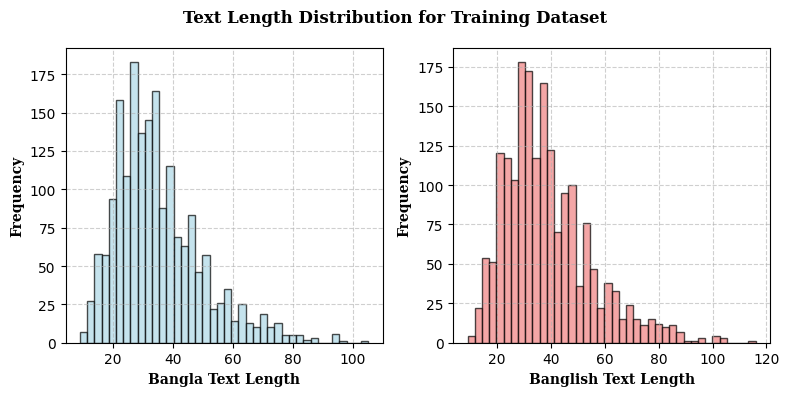

In [12]:
visualize_text_length(train_data, 'Training Dataset')

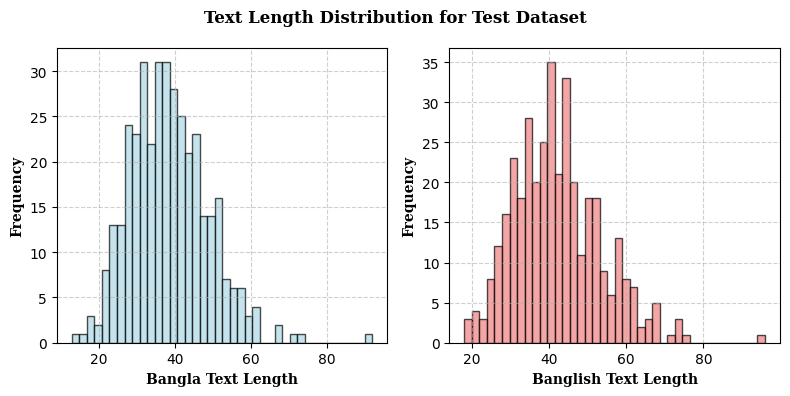

In [13]:
visualize_text_length(test_data , 'Test Dataset')

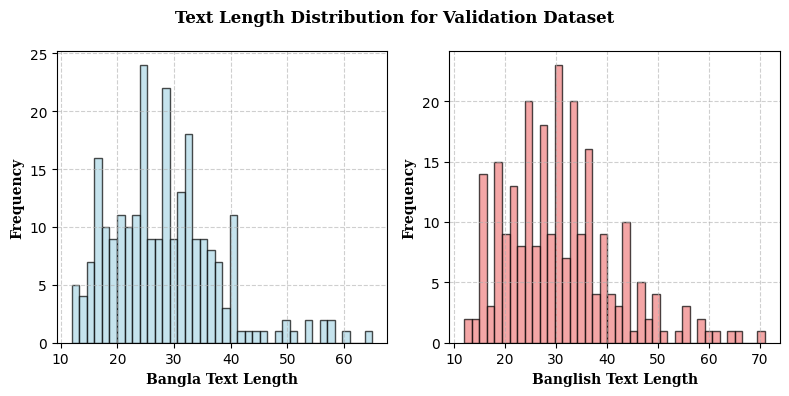

In [14]:
visualize_text_length(validation_data, 'Validation Dataset')

# **Define a function to visualize word count distribution**

In [15]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_word_count(data, title):
    # calculate the word count for each entry in the 'bangla_speech' and 'banglish_speech' columns and store the results in new columns
    data['bangla_speech_word_count'] = data['bangla_speech'].apply(lambda x: len(str(x).split()))
    data['banglish_speech_word_count'] = data['banglish_speech'].apply(lambda x: len(str(x).split()))

    # Create a figure with a larger size
    plt.figure(figsize=(8, 4))

    # Define a custom font with a nice appearance
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    # First subplot for 'Bangla Speech' word count distribution
    plt.subplot(1, 2, 1)
    plt.hist(data['bangla_speech_text_length'], bins=40, color='lightgreen', edgecolor='black', alpha=0.7, label='Bangla Speech')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Word Count", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    # Second subplot for 'banglish Speech' text length distribution
    plt.subplot(1, 2, 2)
    plt.hist(data['banglish_speech_text_length'], bins=40, color='lightgoldenrodyellow', edgecolor='black', alpha=0.7, label='Banglish Speech')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("banglisht Word Count", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')


    # Set a single title for the entire figure
    plt.suptitle(f'Word Count Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')
    # Adjust the layout for subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


# **Visualize word count distribution for each dataset**

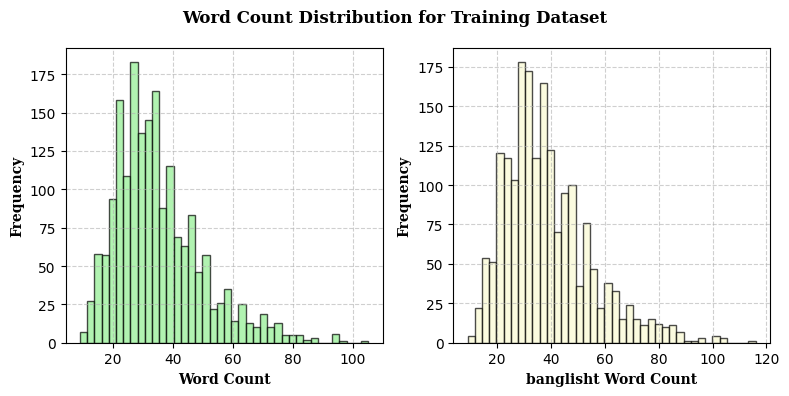

In [16]:
visualize_word_count(train_data , 'Training Dataset')

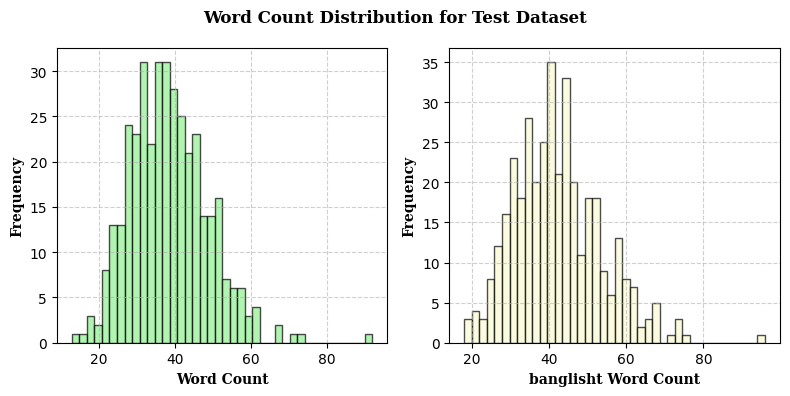

In [17]:
visualize_word_count(test_data , 'Test Dataset')

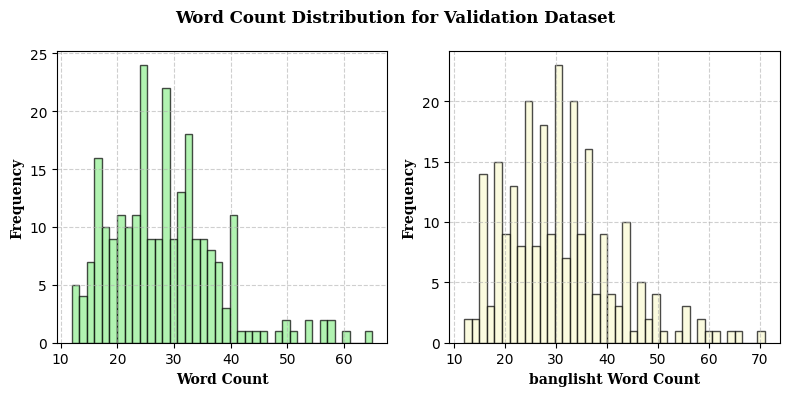

In [18]:
visualize_word_count(validation_data, 'Validation Dataset')

In [19]:
!pip install transformers torch pandas

In [20]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 1.5 MB/s eta 0:00:00


In [21]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=74b6a6968521b8302b531592c287b7ecec47e4b62892150f323d57a0dca07de3
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [22]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.7 MB/s eta 0:00:00


In [23]:
!pip install transformers[sentencepiece]

In [24]:
!transformers-cli cache clear

2024-01-06 07:24:53.180294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 07:24:53.180344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 07:24:53.183421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 07:24:55.510624: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: transformers-cli <command> [<args>]
Transformers CLI tool: error: argument {convert,download,env,run,serve,login,whoami,logout,repo,add-new-model,add-new-model-like,lfs-enable-largefiles,lfs-multipart-upload,pt-to-tf}: invalid choice:

In [25]:
!pip install huggingface-cli

In [26]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 8.1 MB/s eta 0:00:00


In [27]:
!pip install accelerate -U

In [28]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-ikxzsty0
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-ikxzsty0
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6859 sha256=fcaa353f85466e71ec6e2c8ee5310dd54217cdc48cce405960e39938285cafa5
  Stored in directory: /tmp/pip-ephem-wheel-cache-iaec432o/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186460 sha256=270e44410cd3bc84ed2f0b0e03622c0be98e2a2

In [29]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [30]:
!pip install torch transformers

In [31]:
import torch
from transformers import  MT5Model, AutoTokenizer, DataCollatorForSeq2Seq, Trainer, TrainingArguments
from normalizer import normalize
import pandas as pd
import numpy as np
import nltk
from nltk.translate.bleu_score import corpus_bleu
from sacrebleu import sentence_bleu
from rouge_score import rouge_scorer
from sklearn.model_selection import train_test_split
import os


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
# Read the datasets
train_data = pd.read_csv("/content/drive/MyDrive/Banglish to Bangla/train_dataset.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Banglish to Bangla/test_dataset.csv")
validation_data = pd.read_csv("/content/drive/MyDrive/Banglish to Bangla/validation_dataset.csv")

# Remove extra white spaces from column names
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()
validation_data.columns = validation_data.columns.str.strip()


In [34]:
train_data.head()

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,কেমন আছো ?,kemon acho?,কেন আচো?,Ken acho?,Chittagong,How are you?
1,আজকে আমার মন ভালো নেই,ajke amr mon valo nei,আযিয়া আর মন বালা নাই?,ajiya ar mon bala nai?,Chittagong,I'm not feeling well today
2,তুমি কি করো ?,tumi ki koro?,তুঁই কি গরো?,tui ki goro?,Chittagong,what are you doing?
3,এই গরমে আমার কিছু ভালো লাগে না,ei gorome amar kichu valo lage na,এই গরমত আত্তুন কিচু বালা ন লাগের,ei goromot attun kichu bala no lager,Chittagong,I don't like anything this summer
4,ছেলেটি সাদা রঙয়ের একটি শার্ট পরে এসেছিল,cheleti sada ronger ekti shirt pore eshechilo,ফোয়াইবা সাদা রংওর উজ্ঞা শার্ট ফরি আইস্যিল,foyaiba sada rongor ugga shirt fori aissilo,Chittagong,The boy came wearing a white shirt


In [35]:
# Rename the columns to match the expected format
train_data.rename(columns={'banglish_speech': 'input_text', 'bangla_speech': 'labels'}, inplace=True)
train_data.head()

,labels,input_text,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,কেমন আছো ?,kemon acho?,কেন আচো?,Ken acho?,Chittagong,How are you?
1,আজকে আমার মন ভালো নেই,ajke amr mon valo nei,আযিয়া আর মন বালা নাই?,ajiya ar mon bala nai?,Chittagong,I'm not feeling well today
2,তুমি কি করো ?,tumi ki koro?,তুঁই কি গরো?,tui ki goro?,Chittagong,what are you doing?
3,এই গরমে আমার কিছু ভালো লাগে না,ei gorome amar kichu valo lage na,এই গরমত আত্তুন কিচু বালা ন লাগের,ei goromot attun kichu bala no lager,Chittagong,I don't like anything this summer
4,ছেলেটি সাদা রঙয়ের একটি শার্ট পরে এসেছিল,cheleti sada ronger ekti shirt pore eshechilo,ফোয়াইবা সাদা রংওর উজ্ঞা শার্ট ফরি আইস্যিল,foyaiba sada rongor ugga shirt fori aissilo,Chittagong,The boy came wearing a white shirt


In [36]:
test_data.head()

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,তোমার আব্বু কেমন আছে?,tomar abbu kemon ache?,তোয়ার আব্বু কেন আসে?,toyar abbu ken ase?,Chittagong,How is your father?
1,আমার বড় বোনের আজকে মন ভালো নেই,amar boro boner ajke mon valo nei,আর বর বইনোর আজিয়া মন ভালা নাই,ar bor boinor ajiya mon vala nai,Chittagong,My elder sister is not feeling well today
2,তুমি কি আমাকে এই কাজটি করে দিতে পারবে?,tumi ki amake ei kajti kore dite parbe?,তুইকি আরে হাম্মান গরি দিত্তারিবানা?,tuiki are hamman gori dittaribana?,Chittagong,Can you do this for me?
3,এই গরমে বাহিরে বের হতে ইচ্ছা করে না,ei gorome bahire ber hote iccha kore na,এই গরমত বাইর ওইতো মনত নো সার,ei goromot bair oito monot no sar,Chittagong,Don't want to go out in this summer
4,তোমার সব কথাই ভুল,tomar sob kothai vul,তোয়ার বেক হোতাই ভুল,toyar bek hotai vul,Chittagong,Everything you say is wrong


In [37]:
# Rename the columns to match the expected format
test_data.rename(columns={'banglish_speech': 'input_text', 'bangla_speech'	: 'labels'}, inplace=True)
test_data.head()

,labels,input_text,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,তোমার আব্বু কেমন আছে?,tomar abbu kemon ache?,তোয়ার আব্বু কেন আসে?,toyar abbu ken ase?,Chittagong,How is your father?
1,আমার বড় বোনের আজকে মন ভালো নেই,amar boro boner ajke mon valo nei,আর বর বইনোর আজিয়া মন ভালা নাই,ar bor boinor ajiya mon vala nai,Chittagong,My elder sister is not feeling well today
2,তুমি কি আমাকে এই কাজটি করে দিতে পারবে?,tumi ki amake ei kajti kore dite parbe?,তুইকি আরে হাম্মান গরি দিত্তারিবানা?,tuiki are hamman gori dittaribana?,Chittagong,Can you do this for me?
3,এই গরমে বাহিরে বের হতে ইচ্ছা করে না,ei gorome bahire ber hote iccha kore na,এই গরমত বাইর ওইতো মনত নো সার,ei goromot bair oito monot no sar,Chittagong,Don't want to go out in this summer
4,তোমার সব কথাই ভুল,tomar sob kothai vul,তোয়ার বেক হোতাই ভুল,toyar bek hotai vul,Chittagong,Everything you say is wrong


In [38]:
validation_data.head()

,bangla_speech,banglish_speech,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,বাংলাদেশে ৬৪ টা জেলা,bangladeshe ৬৪ ta jela,বাংলাদেশত ৬৪ ইয়ান জেলা,bangladeshot ৬৪ iyan jela,Chittagong,64 districts in Bangladesh
1,আমরা সবাই গতকাল বাহিরে গিয়েছিলাম,amra sobai gotokal bahire giyechilam,আরা বেয়াক্কুন গতহালিয়া বাইরে গেইলাম,ara beyakkun gotohaliya baire geilam,Chittagong,We all went out yesterday
2,তোমার কথা বলার ধরন অনেক সুন্দর,tomar kotha bolar dhoron onek sundor,তোইয়ার হতা বলার ধরণ বহুত সুন্দর,toiyar hota bolar dhoron bohut sundor,Chittagong,Your way of speaking is very nice
3,বরিশালের মানুষ কেমন হয়?,barishaler manush kemon hoy?,বরিশালর মানুষ হইল্লে অয় দে?,barishalor manush hoille oy de?,Chittagong,How are the people of Barisal?
4,খুলনা জেলা কি অনেক সুন্দর?,khulna jela ki onek sundor?,খুলনা জেলা কি বহুত সুন্দর নাকি?,khulna jela ki bohut sundor naki?,Chittagong,Khulna district is very beautiful?


In [39]:
# Rename the columns to match the expected format
validation_data.rename(columns={'banglish_speech': 'input_text', 'bangla_speech'	: 'labels'}, inplace=True)
validation_data.head()

,labels,input_text,chittagong_bangla_speech,chittagong_banglish_speech,region_name,english_speech
0,বাংলাদেশে ৬৪ টা জেলা,bangladeshe ৬৪ ta jela,বাংলাদেশত ৬৪ ইয়ান জেলা,bangladeshot ৬৪ iyan jela,Chittagong,64 districts in Bangladesh
1,আমরা সবাই গতকাল বাহিরে গিয়েছিলাম,amra sobai gotokal bahire giyechilam,আরা বেয়াক্কুন গতহালিয়া বাইরে গেইলাম,ara beyakkun gotohaliya baire geilam,Chittagong,We all went out yesterday
2,তোমার কথা বলার ধরন অনেক সুন্দর,tomar kotha bolar dhoron onek sundor,তোইয়ার হতা বলার ধরণ বহুত সুন্দর,toiyar hota bolar dhoron bohut sundor,Chittagong,Your way of speaking is very nice
3,বরিশালের মানুষ কেমন হয়?,barishaler manush kemon hoy?,বরিশালর মানুষ হইল্লে অয় দে?,barishalor manush hoille oy de?,Chittagong,How are the people of Barisal?
4,খুলনা জেলা কি অনেক সুন্দর?,khulna jela ki onek sundor?,খুলনা জেলা কি বহুত সুন্দর নাকি?,khulna jela ki bohut sundor naki?,Chittagong,Khulna district is very beautiful?


In [ ]:
!pip install huggingface-cli

# **BanglaT5 model and Its Tokenizer**

In [41]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer

model = AutoModelForSeq2SeqLM.from_pretrained("csebuetnlp/banglat5")
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglat5", use_fast=True) #sentencepiece library is required to instantiate the fast tokenizer


# **Loading trained model and tokenizer**

In [ ]:
'''
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer

model = AutoModelForSeq2SeqLM.from_pretrained("/content/drive/MyDrive/Banglish to Bangla/bangla_translation_BanglaT5.pt")
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Banglish to Bangla/bangla_tokenizer_BanglaT5.json", use_fast=True) #sentencepiece library is required to instantiate the fast tokenizer
'''

In [42]:
from torch.utils.data import Dataset, DataLoader

# **Custom Dataset**

In [43]:
class Seq2SeqDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        """
        Args:
            data: A DataFrame containing 'input_text' and 'labels' columns.
            tokenizer: A Hugging Face tokenizer.
            max_length: Maximum sequence length.
        """
        self.input_text = data['input_text'].apply(normalize).tolist()
        self.labels = data['labels'].apply(normalize).tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.input_text)

    def __getitem__(self, idx):
        input_text = self.input_text[idx]
        label_text = self.labels[idx]

        # Tokenize the input text
        input_encodings = self.tokenizer(
            input_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Tokenize the label text to get its 'input_ids' and 'attention_mask'
        label_encodings = self.tokenizer(
            label_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': input_encodings['input_ids'].squeeze(),
            'attention_mask': input_encodings['attention_mask'].squeeze(),
            'labels': label_encodings['input_ids'].squeeze(),
        }


In [44]:
# Create train , test and validation datasets
train_dataset = Seq2SeqDataset(train_data, tokenizer)
test_dataset = Seq2SeqDataset(test_data, tokenizer)
validation_dataset = Seq2SeqDataset(validation_data, tokenizer)

# Create train , test and validation dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)  #batch_size=32
test_dataloader = DataLoader(test_dataset, batch_size=16) #batch_size=32
validation_dataloader = DataLoader(validation_dataset, batch_size=16) #batch_size=32


# **training dataset encoding**

In [45]:
# Assuming you have already created the train_dataloader
for data_point in train_dataloader:
    input_ids = data_point['input_ids']
    attention_mask = data_point['attention_mask']
    labels = data_point['labels']

    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


Input IDs: tensor([[13232,  7270,  1898,  ...,     0,     0,     0],
        [ 7222,  6931,  4764,  ...,     0,     0,     0],
        [10866,    20, 17527,  ...,     0,     0,     0],
        ...,
        [   20, 31827,   806,  ...,     0,     0,     0],
        [ 4212,  6796,  3230,  ...,     0,     0,     0],
        [29272,   965, 12101,  ...,     0,     0,     0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels: tensor([[  123,  1036,    30,  ...,     0,     0,     0],
        [25302,    10,  1689,  ...,     0,     0,     0],
        [   22,  2462,  7347,  ...,     0,     0,     0],
        ...,
        [  948,   136,   198,  ...,     0,     0,     0],
        [ 1555, 13207,  2713,  ...,     0,     0,     0],
        [  129,  1679,   337,  ...,     0,     0,     0]])
Input IDs: tensor([[132

# **testing dataset encoding**

In [46]:
# Assuming you have already created the test_dataloader
for data_point in test_dataloader:
    input_ids = data_point['input_ids']
    attention_mask = data_point['attention_mask']
    labels = data_point['labels']

    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)

Input IDs: tensor([[17923, 16414,  6796,  ...,     0,     0,     0],
        [10866,  5712,  2520,  ...,     0,     0,     0],
        [15487,  7254,   559,  ...,     0,     0,     0],
        ...,
        [10866,  8839, 16446,  ...,     0,     0,     0],
        [10866,  6404,   165,  ...,     0,     0,     0],
        [10866,    20, 18711,  ...,     0,     0,     0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels: tensor([[ 108, 6176,  273,  ...,    0,    0,    0],
        [  22,  118, 3496,  ...,    0,    0,    0],
        [  88,   29,  136,  ...,    0,    0,    0],
        ...,
        [  22, 3775, 3665,  ...,    0,    0,    0],
        [  22, 3226, 6603,  ...,    0,    0,    0],
        [  22,  460, 4441,  ...,    0,    0,    0]])
Input IDs: tensor([[10866,  4795, 18440,  ...,     0,     0

# **validation dataset encoding**

In [47]:
# Assuming you have already created the validation_dataloader
for data_point in validation_dataloader:
    input_ids = data_point['input_ids']
    attention_mask = data_point['attention_mask']
    labels = data_point['labels']

    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)

Input IDs: tensor([[   20, 31827,   806,  ...,     0,     0,     0],
        [ 7222,  2182,  4212,  ...,     0,     0,     0],
        [17923, 18079, 20712,  ...,     0,     0,     0],
        ...,
        [15487,  2511,  2846,  ...,     0,     0,     0],
        [17823,  9521, 17564,  ...,     0,     0,     0],
        [ 6227,   689,  1564,  ...,     0,     0,     0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels: tensor([[  948,  8007,   238,  ...,     0,     0,     0],
        [   89,   198,   369,  ...,     0,     0,     0],
        [  108,    39,   773,  ...,     0,     0,     0],
        ...,
        [   88,   212,  5289,  ...,     0,     0,     0],
        [   14,   391,    29,  ...,     0,     0,     0],
        [16870,   155,   167,  ...,     0,     0,     0]])
Input IDs: tensor([[120

# **from training dataset , I have done only one example decoding**

In [48]:
# Assuming you have already created the train_dataloader with shuffle
for data_point in train_dataloader:
    input_ids = data_point['input_ids'][0]  # Assuming you want the first example
    attention_mask = data_point['attention_mask'][0]
    labels = data_point['labels'][0]

    # Decode input_ids and labels
    input_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    output_text = tokenizer.decode(labels, skip_special_tokens=True)

    print("Input Text:", input_text)
    print("Output Text:", output_text)

    # Exit the loop after processing the first example
    break


Input Text: tomar bondhura shobai khub medhabi
Output Text: তোমার বন্ধুরা সবাই খুব মেধাবী


# **from testing dataset , I have done only one example decoding**

In [49]:
# Assuming you have already created the test_dataloader
for data_point in test_dataloader:
    input_ids = data_point['input_ids'][0]  # Assuming you want the first example
    attention_mask = data_point['attention_mask'][0]
    labels = data_point['labels'][0]

    # Decode input_ids and labels
    input_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    output_text = tokenizer.decode(labels, skip_special_tokens=True)

    print("Input Text:", input_text)
    print("Output Text:", output_text)

    # Exit the loop after processing the first example
    break


Input Text: tomar abbu kemon ache?
Output Text: তোমার আব্বু কেমন আছে?


# **from validation dataset , I have done only one example decoding**

In [50]:
# Assuming you have already created the validation_dataloader
for data_point in validation_dataloader:
    input_ids = data_point['input_ids'][0]  # Assuming you want the first example
    attention_mask = data_point['attention_mask'][0]
    labels = data_point['labels'][0]

    # Decode input_ids and labels
    input_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    output_text = tokenizer.decode(labels, skip_special_tokens=True)

    print("Input Text:", input_text)
    print("Output Text:", output_text)

    # Exit the loop after processing the first example
    break


Input Text: bangladeshe ৬৪ ta jela
Output Text: বাংলাদেশে ৬৪ টা জেলা


In [51]:
# Move the model to the device (CPU or GPU)
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [52]:
from transformers import TrainingArguments
from torch.optim import AdamW

# Create a custom optimizer using torch.optim.AdamW
custom_optimizer = AdamW(
    model.parameters(),
    lr=1e-3,  # Learning rate
    eps=1e-8,  # Epsilon value to prevent division by zero
    weight_decay=0.01,  # Weight decay (L2 regularization)
)

#if you have 1,000 training examples and a batch size of 100, you would have 10 iterations in each epoch (1,000 / 100 = 10)
'''
This parameter determines how many small batches are accumulated before performing a weight update.
In your code, it's set to 8, which means you'll accumulate gradients over 8 small batches before performing a weight update.
This effectively simulates a larger batch size without requiring more GPU memory.
So, you are updating the model's weights less frequently compared to the number of actual batches processed.
'''
'''
Learning rate determines how quickly the model learns from the data.
The learning rate scheduler type is set to "cosine_with_restarts," which is a type of learning rate schedule.
 Warmup steps are the number of initial training steps with a smaller learning rate, and weight decay introduces L2 regularization to the optimizer.
'''
'''
Number of Iterations per Epoch = Number of Training Samples / Batch Size
Total Iterations = Number of Iterations per Epoch * Number of Epochs
'''
# Define the TrainingArguments
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Machine_Translation/banglish_to_bangla_translation_BanglaT5',
    num_train_epochs=15,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,  # Accumulate gradients over 8 small batches
    evaluation_strategy="steps",
    eval_steps=500,
    save_total_limit=2,
    save_steps=500,
    learning_rate=1e-3,
    do_train=True,
    do_eval=True,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="none",
    load_best_model_at_end=True,
    lr_scheduler_type="cosine_with_restarts",  # Set the learning rate scheduler type
    warmup_steps=100,  # Number of warmup steps
    weight_decay=0.01,  # Weight decay (L2 regularization)
    logging_dir='/content/drive/MyDrive/Machine_Translation/banglish_to_bangla_translation_BanglaT5',  # Use the same directory for logs
    logging_steps=500,  # Log every 500 steps
)


In [53]:
from transformers import DataCollatorForSeq2Seq
# Create a data collator for sequence-to-sequence tasks
data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,  # Your Hugging Face tokenizer
    model=model,
    padding=True,
    max_length=128,
    label_pad_token_id=tokenizer.pad_token_id,
)

In [54]:
# Define the Trainer with the custom optimizer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    optimizers=(custom_optimizer, None),  # Pass the custom optimizer here
)

# **Training start here**

In [55]:
# Fine-tune the model
trainer.train()

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


Step,Training Loss,Validation Loss
500,9.208300,0.327088
1000,0.408000,0.306714
1500,0.377900,0.277734
2000,0.220600,0.048087
2500,0.046100,0.037659
3000,0.021800,0.037275
3500,0.016900,0.037712


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/usr

TrainOutput(global_step=3510, training_loss=1.4672470580563586, metrics={'train_runtime': 3602.432, 'train_samples_per_second': 7.807, 'train_steps_per_second': 0.974, 'total_flos': 4806996614184960.0, 'train_loss': 1.4672470580563586, 'epoch': 14.98})

# **Saving model and tokenizer**

In [56]:
from transformers import AutoModelForSeq2SeqLM

# Save the model
model.save_pretrained('/content/drive/MyDrive/Banglish to Bangla/bangla_translation_BanglaT5.pt')

# Save the tokenizer
tokenizer.save_pretrained('/content/drive/MyDrive/Banglish to Bangla/bangla_tokenizer_BanglaT5.json')


('/content/drive/MyDrive/Banglish to Bangla/bangla_tokenizer_BanglaT5.json/tokenizer_config.json',
 '/content/drive/MyDrive/Banglish to Bangla/bangla_tokenizer_BanglaT5.json/special_tokens_map.json',
 '/content/drive/MyDrive/Banglish to Bangla/bangla_tokenizer_BanglaT5.json/spiece.model',
 '/content/drive/MyDrive/Banglish to Bangla/bangla_tokenizer_BanglaT5.json/added_tokens.json',
 '/content/drive/MyDrive/Banglish to Bangla/bangla_tokenizer_BanglaT5.json/tokenizer.json')

In [57]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.7 MB/s eta 0:00:00


In [58]:
# Move the model to the device (CPU or GPU)
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [59]:
!pip install rouge-score
#https://github.com/google-research/google-research/tree/master/rouge
#https://huggingface.co/spaces/evaluate-metric/rouge [Different types of ROUGE scores]

In [60]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00


# **Loading evaluation metrics**

In [61]:
import torch
from evaluate import load
# Define the move_to_device function
def move_to_device(batch, device):
    if isinstance(batch, torch.Tensor):
        return batch.to(device)
    elif isinstance(batch, list):
        return [move_to_device(item, device) for item in batch]
    elif isinstance(batch, dict):
        return {key: move_to_device(value, device) for key, value in batch.items()}
    else:
        return batch  # If it's not a tensor, list, or dict, leave it as is

# Load the evaluation metric for Character Error Rate (CER) and Word Error Rate (WER) and Exact Match(em)
cer_metric = load("cer")
wer_metric = load("wer")
meteor = load('meteor')
exact_match_metric = load("exact_match")

# Load BLEU and ROUGE metrics
bleu_metric = load("bleu")
rouge_metric = load('rouge')

# Initialize lists to store generated translations and references
generated_translations = []
references = []

# Generate translations for the test dataset
for batch in test_dataloader:
    # Move the batch to CUDA
    batch = move_to_device(batch, 'cuda')

    input_text = batch['input_ids']  # Access the input_text using the correct key
    labels = batch['labels']  # Access the labels using the correct key

    # Generate translations
    translation_ids = model.generate(input_text, max_length=512, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Move the translation_ids to CPU to decode
    translation_ids = translation_ids.to('cpu')

    generated_translation = tokenizer.batch_decode(translation_ids, skip_special_tokens=True)

    generated_translations.extend(generated_translation)
    references.extend(tokenizer.batch_decode(labels, skip_special_tokens=True))  # Decoding the label IDs


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [62]:
print("Number of generated translations:", len(generated_translations))
print("Number of references:", len(references))

Number of generated translations: 375
Number of references: 375


In [63]:
print(generated_translations)

['তোমার আব্বু কেমন আছে?', 'আমার বড় বোনের আজকে মন ভালো নেই', 'তুমি কি আমাকে এই কাজ করে দিতে পারবে?', 'এই ভিতরে বাহিরে বের হতে চায় না', 'তোমার সব কথাই ভুল', 'তোমার মত খারাপ ছেলে আমি আর একবারও দেখিনি', 'বিয়ের জন্য আমমার জন্য আম আমার জন্য ছেলে খুঁজছে', 'বাবা আমাকে গতকাল একটা ছেলের সাথে দেখা করতে বলেছিল', 'ছেলেটিকে আমার একদমই ভালো লাগেনি', 'মেয়েটি পলাশে রঙের শাড়ি পড়ে এসেছিল', 'আমার দুইদিন পরে বিয়ে হবে', 'ছেলেটি এখন আর রান্নাঘরে খেলতে বের হয় না', 'মেয়েটি সকালবেলা ঘুম থেকে উঠেই পড়তে বসে', 'আমার চাচা বিদেশ থেকে গতকাল বাংলাদেশে এসেছে', 'আমার বাসার দার দারওয়ান অনেক ভালো মানুষ', 'আমার বন্ধু টলনা ঘুরতে গিয়েছে', 'আমার ঘুরতে অনেক ভালো লাগে', 'আমি বিদেশে গিয়ে অনেক ঘুরতে চাই', 'তুমি আমাকে বিরক্ত করো না', 'তিনি আমাকে অনেক অপমান করেছে', 'আমার সকালে উঠে বই পড়তে অনেক ভালো লাগে ', 'আমার ছোট ভাই দুজনই পড়ালেখা করতে চায় না', 'আমার ছোট ভাই বিদ্যালয়ে যেতে চায় না', 'আমার ছোটো ভাইয়ের বিদ্যালয়ে গিয়ে পড়ালেখা করতে গেলে না', 'আমি একদিন বিদ্যালয়ের মাঠে মাথা ঘুরিয়ে পরে গেছিলাম', 'আপনি কি আমাকে ক

In [64]:
print(references)

['তোমার আব্বু কেমন আছে?', 'আমার বড় বোনের আজকে মন ভালো নেই', 'তুমি কি আমাকে এই কাজটি করে দিতে পারবে?', 'এই গরমে বাহিরে বের হতে ইচ্ছা করে না', 'তোমার সব কথাই ভুল', 'তোমার মত খারাপ ছেলে আমি আর একটাও দেখিনি', 'বিয়ের জন্য আম্মা আমার জন্য ছেলে খুজতাসে', 'আব্বা আমাকে গতকাল একটা ছেলের সাথে দেখা করতে বলেছিল', 'ছেলেটিকে আমার একদমই ভালো লাগেনি', 'মেয়েটি গোলাপি রঙের শাড়ি পরে এসেছিল', 'আমার দুইদিন পরে বিয়ে হবে', 'ছেলেটি এখন আর বিকালে খেলতে বের হয় না', 'মেয়েটি সকালে ঘুম থেকে উঠেই পরতে বসে', 'আমার চাচা বিদেশ থেকে গতকাল বাংলাদেশে এসেছে', 'আমার বাসার দারওয়ান অনেক ভালো মানুষ', 'আমার বন্ধু খুলনা ঘুরতে গিয়েছে', 'আমার ঘুরতে অনেক ভালো লাগে', 'আমি বিদেশে গিয়ে অনেক ঘুরতে চাই', 'তুমি আমাকে বিরক্ত করো না', 'তিনি আমাকে অনেক অপমান করেছে', 'আমার সকালে উঠে বই পরতে অনেক ভালো লাগে', 'আমার ছোট ভাই একদমই পড়ালেখা করতে চায় না', 'আমার ছোট ভাই বিদ্যালয়ে যেতে চায় না', 'আমার ছোট ভাইয়ের বিদ্যালয়ে গিয়ে পড়ালেখা করতে ভাল লাগে না', 'আমি একদিন বিদ্যালয়ের মাঠে মাথা ঘুরিয়ে পরে গিয়েছিলাম', 'আপনি কি আমাকে কোনদিনও 

In [65]:
# Calculate Character Error Rate (CER) and Word Error Rate (WER)
results_CER = cer_metric.compute(predictions=generated_translations, references=references)
results_WER = wer_metric.compute(predictions=generated_translations, references=references)

# Calculate Exact Match (EM) and METEOR(M)
results_em = exact_match_metric.compute(predictions=generated_translations, references=references)
results_met = meteor.compute(predictions=generated_translations, references=references)

# Calculate Bilingual Evaluation Understudy (BLEU) and Recall-Oriented Understudy for Gisting Evaluation (ROUGE)
results_bleu = bleu_metric.compute(predictions=generated_translations, references=references)


# **Printing every evaluation metrics**

In [66]:
print("Character Error Rate for Banglish to Bangla Translation:", results_CER)
print("Word Error Rate for Banglish to Bangla Translation:",results_WER)
print("Exact Match for Banglish to Bangla Translation:",results_em)
print("BLEU Score for Banglish to Bangla Translation:",results_bleu)
print("METEOR for Banglish to Bangla Translation:",results_met)


Character Error Rate for Banglish to Bangla Translation: 0.0921887938172785
Word Error Rate for Banglish to Bangla Translation: 0.16031099592743428
Exact Match for Banglish to Bangla Translation: {'exact_match': 0.33866666666666667}
BLEU Score for Banglish to Bangla Translation: {'bleu': 0.6697053370777062, 'precisions': [0.8635014836795252, 0.7337354588539423, 0.6269270298047277, 0.5334182049649905], 'brevity_penalty': 0.9871017093749851, 'length_ratio': 0.9871841816184548, 'translation_length': 2696, 'reference_length': 2731}
METEOR for Banglish to Bangla Translation: {'meteor': 0.8262301250311924}


In [67]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.6 MB/s eta 0:00:00


In [68]:
from rouge_score import rouge_scorer
from unidecode import unidecode

# Initialize the Rouge scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=False)

# Preprocess the text
def preprocess_text(text):
    text = unidecode(text)
    tokens = text.split()
    return ' '.join(tokens)

# Calculate scores for each pair of predictions and references
rouge1_f1_scores = []
rouge1_precision_scores = []
rouge1_recall_scores = []
rouge2_f1_scores = []
rouge2_precision_scores = []
rouge2_recall_scores = []
rougeL_f1_scores = []
rougeL_precision_scores = []
rougeL_recall_scores = []

for ref, pred in zip(references, generated_translations):
    candidate = preprocess_text(pred)
    reference = preprocess_text(' '.join(ref))
    scores = scorer.score(reference, candidate)

    rouge1_f1_scores.append(scores['rouge1'].fmeasure)
    rouge1_precision_scores.append(scores['rouge1'].precision)
    rouge1_recall_scores.append(scores['rouge1'].recall)
    rouge2_f1_scores.append(scores['rouge2'].fmeasure)
    rouge2_precision_scores.append(scores['rouge2'].precision)
    rouge2_recall_scores.append(scores['rouge2'].recall)
    rougeL_f1_scores.append(scores['rougeL'].fmeasure)
    rougeL_precision_scores.append(scores['rougeL'].precision)
    rougeL_recall_scores.append(scores['rougeL'].recall)

# Calculate the average scores
avg_rouge1_f1 = sum(rouge1_f1_scores) / len(rouge1_f1_scores)
avg_rouge1_precision = sum(rouge1_precision_scores) / len(rouge1_precision_scores)
avg_rouge1_recall = sum(rouge1_recall_scores) / len(rouge1_recall_scores)
avg_rouge2_f1 = sum(rouge2_f1_scores) / len(rouge2_f1_scores)
avg_rouge2_precision = sum(rouge2_precision_scores) / len(rouge2_precision_scores)
avg_rouge2_recall = sum(rouge2_recall_scores) / len(rouge2_recall_scores)
avg_rougeL_f1 = sum(rougeL_f1_scores) / len(rougeL_f1_scores)
avg_rougeL_precision = sum(rougeL_precision_scores) / len(rougeL_precision_scores)
avg_rougeL_recall = sum(rougeL_recall_scores) / len(rougeL_recall_scores)

# Print the average scores
print("Average Rouge-1 F1 Score:", avg_rouge1_f1)
print("Average Rouge-1 Precision:", avg_rouge1_precision)
print("Average Rouge-1 Recall:", avg_rouge1_recall)

print("Average Rouge-2 F1 Score:", avg_rouge2_f1)
print("Average Rouge-2 Precision:", avg_rouge2_precision)
print("Average Rouge-2 Recall:", avg_rouge2_recall)

print("Average Rouge-L F1 Score:", avg_rougeL_f1)
print("Average Rouge-L Precision:", avg_rougeL_precision)
print("Average Rouge-L Recall:", avg_rougeL_recall)


Average Rouge-1 F1 Score: 0.015790821085776386
Average Rouge-1 Precision: 0.035733462833462806
Average Rouge-1 Recall: 0.010173311903929947
Average Rouge-2 F1 Score: 0.0
Average Rouge-2 Precision: 0.0
Average Rouge-2 Recall: 0.0
Average Rouge-L F1 Score: 0.015790821085776386
Average Rouge-L Precision: 0.035733462833462806
Average Rouge-L Recall: 0.010173311903929947


# **Saving input text(Banglish), labels(Bangla) and generated translations to csv**

In [69]:
import pandas as pd

# Create a DataFrame to store translations
translation_df = pd.DataFrame({
    'input_text': test_data['input_text'],  # Assuming 'test_data' contains your test dataset
    'labels': references,
    'translations': generated_translations
})

# Save translations to a CSV file
translation_df.to_csv("/content/drive/MyDrive/Banglish to Bangla/banglish_to_bangla_BanglaT5_translations.csv", index=False)
